In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs as data
from sklearn.cluster import KMeans

In [14]:
data=pd.read_csv('segmented_customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [15]:
X=data.drop(['CustomerID', 'Gender', 'Annual Income (k$)', 'cluster'], axis=1)
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [16]:
y=data['cluster']
y.head()

0    4
1    3
2    4
3    3
4    4
Name: cluster, dtype: int64

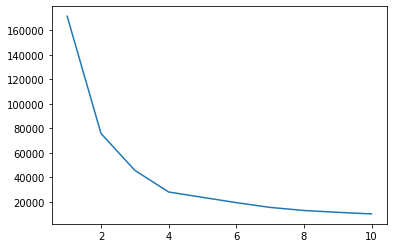

In [17]:
scores = []
kn = list(range(1,11))
for k in kn:
  model = KMeans(n_clusters=k, init='k-means++', random_state=0)
  model.fit(X)
  scores.append(abs(model.score(X)))

plt.plot(kn, scores)

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++')
y_pred=kmeans.fit_predict(X)
print(y_pred)

[3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 3 3 1 0 3 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1
 0 1 0 2 0 2 3 1 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 2 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


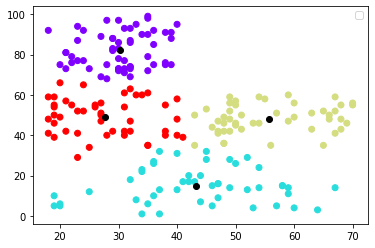

In [19]:
plt.scatter(X['Age'],X['Spending Score (1-100)'],c=y_pred, cmap='rainbow')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black', alpha=1)
plt.legend()
plt.show()